<a href="https://colab.research.google.com/github/bhoomibhoomi7795-code/Gen_ai_feb/blob/main/train_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages (uncomment if running on Colab)
# !pip install tensorflow numpy matplotlib

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.19.0
Keras version: 3.10.0


In [3]:
# Let's build a simple RNN from scratch to understand the concept

class SimpleRNN:
    """A simple RNN implementation for educational purposes."""

    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights randomly
        self.Wxh = np.random.randn(hidden_size, input_size) * 0.01
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.Why = np.random.randn(output_size, hidden_size) * 0.01
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))

    def forward(self, inputs, h_prev):
        """Forward pass through one time step."""
        # Hidden state update
        h_next = np.tanh(self.Wxh @ inputs + self.Whh @ h_prev + self.bh)
        # Output
        y = self.Why @ h_next + self.by
        return y, h_next

# Demo: Process a sequence
rnn = SimpleRNN(input_size=10, hidden_size=20, output_size=5)
h = np.zeros((20, 1))  # Initial hidden state

# Simulate 3 time steps
for t in range(3):
    x = np.random.randn(10, 1)  # Random input
    y, h = rnn.forward(x, h)
    print(f"Time step {t+1}: Output shape = {y.shape}, Hidden state shape = {h.shape}")

Time step 1: Output shape = (5, 1), Hidden state shape = (20, 1)
Time step 2: Output shape = (5, 1), Hidden state shape = (20, 1)
Time step 3: Output shape = (5, 1), Hidden state shape = (20, 1)


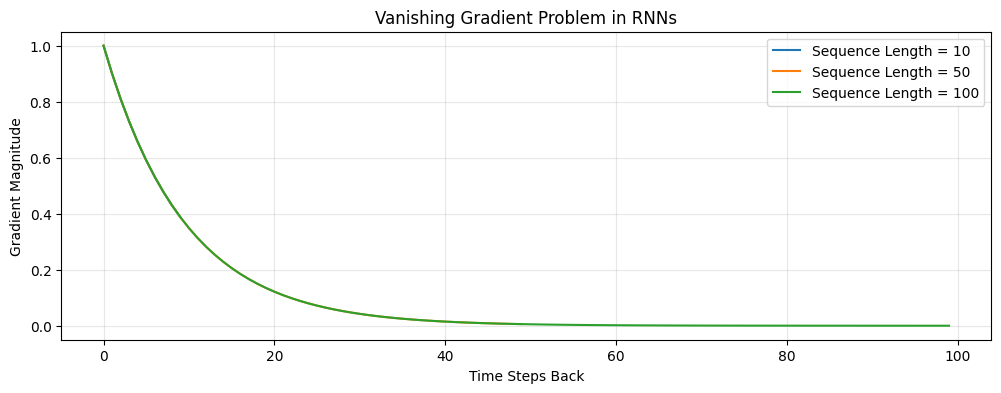


After 100 steps, gradient is only 0.0000295127 of original!


In [4]:
# Demonstration of vanishing gradients

def simulate_gradient_flow(sequence_length, gradient_factor=0.9):
    """Simulate how gradients diminish over time."""
    gradients = [1.0]  # Initial gradient
    for _ in range(sequence_length - 1):
        gradients.append(gradients[-1] * gradient_factor)
    return gradients

# Visualize gradient flow
seq_lengths = [10, 50, 100]
plt.figure(figsize=(12, 4))

for seq_len in seq_lengths:
    grads = simulate_gradient_flow(seq_len)
    plt.plot(grads, label=f'Sequence Length = {seq_len}')

plt.xlabel('Time Steps Back')
plt.ylabel('Gradient Magnitude')
plt.title('Vanishing Gradient Problem in RNNs')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nAfter 100 steps, gradient is only {simulate_gradient_flow(100)[-1]:.10f} of original!")

In [5]:
# Building an LSTM with Keras

# Create a simple LSTM model
lstm_model = keras.Sequential([
    layers.LSTM(64, input_shape=(10, 32), return_sequences=True),  # 10 time steps, 32 features
    layers.LSTM(32),  # Second LSTM layer
    layers.Dense(10, activation='softmax')  # Output layer
])

lstm_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,578 (146.79 KB)

 Trainable params: 37,578 (146.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Building a GRU with Keras

gru_model = keras.Sequential([
    layers.GRU(64, input_shape=(10, 32), return_sequences=True),
    layers.GRU(32),
    layers.Dense(10, activation='softmax')
])

gru_model.summary()

# Compare parameter counts
print(f"\n📊 Parameter Comparison:")
print(f"LSTM Model: {lstm_model.count_params():,} parameters")
print(f"GRU Model:  {gru_model.count_params():,} parameters")
print(f"GRU has {(1 - gru_model.count_params()/lstm_model.count_params())*100:.1f}% fewer parameters!")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 64)         │        18,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,554 (111.54 KB)

 Trainable params: 28,554 (111.54 KB)

 Non-trainable params: 0 (0.00 B)


📊 Parameter Comparison:
LSTM Model: 37,578 parameters
GRU Model:  28,554 parameters
GRU has 24.0% fewer parameters!


In [7]:
# Step 1: Load the Shakespeare dataset

# Download Shakespeare text
path_to_file = keras.utils.get_file(
    'shakespeare.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'
)

# Read the text
text = open(path_to_file, 'r', encoding='utf-8').read()

# Print some statistics
print(f"📚 Dataset Statistics:")
print(f"Total characters: {len(text):,}")
print(f"Unique characters: {len(set(text))}")
print(f"\n📖 First 500 characters:")
print(text[:500])

1115394/1115394 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
📚 Dataset Statistics:
Total characters: 1,115,394
Unique characters: 65

📖 First 500 characters:
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


In [8]:
# Step 2: Preprocess the text

# Create character to index mapping
chars = sorted(list(set(text)))
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for i, ch in enumerate(chars)}

vocab_size = len(chars)
print(f"📝 Vocabulary size: {vocab_size}")
print(f"\n📋 Character mapping (first 20):")
for i, ch in enumerate(chars[:20]):
    print(f"  '{ch}' → {i}", end="  ")
    if (i + 1) % 5 == 0:
        print()

📝 Vocabulary size: 65

📋 Character mapping (first 20):
  '
' → 0    ' ' → 1    '!' → 2    '$' → 3    '&' → 4  
  ''' → 5    ',' → 6    '-' → 7    '.' → 8    '3' → 9  
  ':' → 10    ';' → 11    '?' → 12    'A' → 13    'B' → 14  
  'C' → 15    'D' → 16    'E' → 17    'F' → 18    'G' → 19  


In [9]:
# Step 3: Create training sequences

# We'll use a smaller subset for faster training in this demo
text_subset = text[:100000]  # Use first 100K characters

# Sequence length (how many characters to look at)
seq_length = 100

# Create input-output pairs
sequences = []
next_chars = []

for i in range(0, len(text_subset) - seq_length, 3):  # Step by 3 to create more diverse samples
    sequences.append(text_subset[i:i + seq_length])
    next_chars.append(text_subset[i + seq_length])

print(f"🔢 Number of training sequences: {len(sequences):,}")

# Show an example
print(f"\n📌 Example sequence:")
print(f"Input:  '{sequences[0]}'")
print(f"Target: '{next_chars[0]}'")

🔢 Number of training sequences: 33,300

📌 Example sequence:
Input:  'First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You'
Target: ' '


In [10]:
# Step 4: One-hot encode the sequences

print("⏳ Creating one-hot encoded arrays...")

# Create numpy arrays
X = np.zeros((len(sequences), seq_length, vocab_size), dtype=np.float32)
y = np.zeros((len(sequences), vocab_size), dtype=np.float32)

for i, (seq, target) in enumerate(zip(sequences, next_chars)):
    for t, char in enumerate(seq):
        X[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[target]] = 1

print(f"✅ Data shapes:")
print(f"   X (input):  {X.shape}  - (samples, timesteps, features)")
print(f"   y (target): {y.shape}  - (samples, vocab_size)")

⏳ Creating one-hot encoded arrays...
✅ Data shapes:
   X (input):  (33300, 100, 65)  - (samples, timesteps, features)
   y (target): (33300, 65)  - (samples, vocab_size)


In [11]:
# Step 5: Build the LSTM model for text generation

def build_text_generator(seq_length, vocab_size):
    model = keras.Sequential([
        layers.LSTM(256, input_shape=(seq_length, vocab_size), return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(256),
        layers.Dropout(0.2),
        layers.Dense(vocab_size, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

model = build_text_generator(seq_length, vocab_size)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 256)       │       329,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 65)             │        16,705 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 871,745 (3.33 MB)

 Trainable params: 871,745 (3.33 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Step 6: Train the model

print("🚀 Starting training...")
print("(This may take a few minutes. For better results, increase epochs!)\n")

# Train for a few epochs (increase for better results)
history = model.fit(
    X, y,
    batch_size=128,
    epochs=5,  # Increase this for better results (10-20 recommended)
    validation_split=0.1,
    verbose=1
)

🚀 Starting training...
(This may take a few minutes. For better results, increase epochs!)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.1335 - loss: 3.4046 - val_accuracy: 0.1709 - val_loss: 3.0271
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.2194 - loss: 2.8870 - val_accuracy: 0.3216 - val_loss: 2.4040
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.3219 - loss: 2.4083 - val_accuracy: 0.3553 - val_loss: 2.2089
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.3623 - loss: 2.2247 - val_accuracy: 0.3841 - val_loss: 2.1026
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.3972 - loss: 2.1005 - val_accuracy: 0.4132 - val_loss: 2.0040


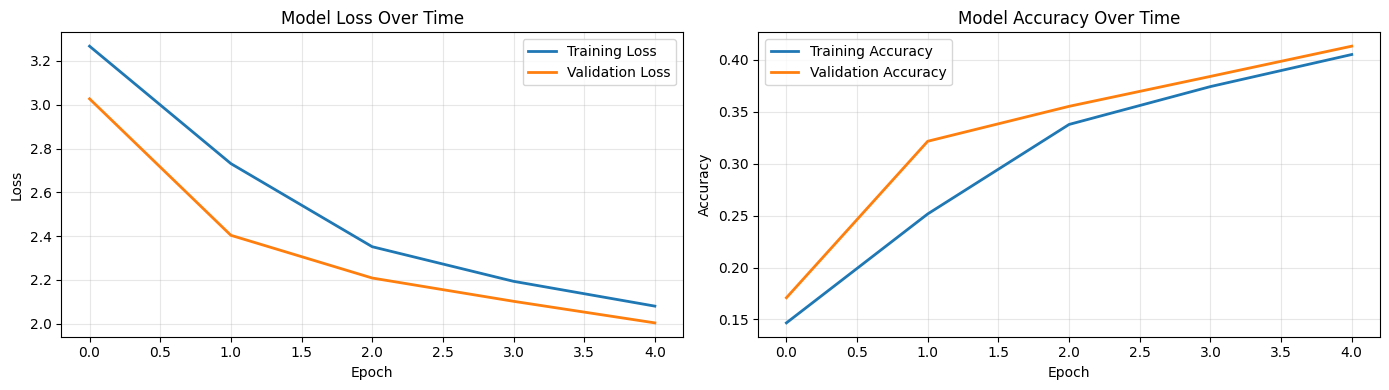

In [13]:
# Step 7: Visualize training progress

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot Loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Model Loss Over Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot Accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Model Accuracy Over Time')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
# Step 8: Generate text!

def sample_with_temperature(predictions, temperature=1.0):
    """
    Sample from predictions with temperature.
    Higher temperature = more random, lower = more deterministic.
    """
    predictions = np.asarray(predictions).astype('float64')
    predictions = np.log(predictions + 1e-10) / temperature
    exp_preds = np.exp(predictions)
    predictions = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, predictions, 1)
    return np.argmax(probas)

def generate_text(model, seed_text, length=200, temperature=0.5):
    """
    Generate text starting from a seed text.
    """
    generated = seed_text

    for _ in range(length):
        # Prepare input
        x_pred = np.zeros((1, seq_length, vocab_size))
        for t, char in enumerate(generated[-seq_length:]):
            if char in char_to_idx:
                x_pred[0, t, char_to_idx[char]] = 1

        # Predict next character
        predictions = model.predict(x_pred, verbose=0)[0]
        next_idx = sample_with_temperature(predictions, temperature)
        next_char = idx_to_char[next_idx]

        generated += next_char

    return generated

# Generate text with different temperatures
seed_text = text[:seq_length]  # Use beginning of text as seed

print("="*80)
print("🎭 GENERATED TEXT EXAMPLES")
print("="*80)

for temp in [0.2, 0.5, 1.0]:
    print(f"\n📝 Temperature = {temp} (higher = more creative)")
    print("-"*60)
    generated = generate_text(model, seed_text, length=200, temperature=temp)
    print(generated[seq_length:])  # Print only the generated part
    print()

🎭 GENERATED TEXT EXAMPLES

📝 Temperature = 0.2 (higher = more creative)
------------------------------------------------------------
 to the sount to the corenter the conde the be the soud the hather the thend the hat the has the the he to the pourt and the poore the hather the beather,
What the sound the corse the beather the the 


📝 Temperature = 0.5 (higher = more creative)
------------------------------------------------------------
 wot the and wo the poulldes, I word in the badest to dours to wire to the walldtis,
We that the bangt to whand the sous he showend as mane for thint the nour in sall as you coted.

MARCIUS:
I the bus


📝 Temperature = 1.0 (higher = more creative)
------------------------------------------------------------
r I the cotrnaengiundd
jod thentte- condes I yhu the eod dlam
ther sond hete
g and mo pas?

MENENIUS:
Hecesh,
Wher fory moals.
Bieg to he to four'y vak des gon douill fow,
To sand ow us ke cithin brab



In [15]:
# YOUR EXPERIMENTS HERE

# Try generating with your own seed text!
my_seed = "To be or not to be, that is the question whether tis nobler in the mind to suffer the slings and"

# Make sure seed is exactly seq_length characters
if len(my_seed) < seq_length:
    my_seed = my_seed + " " * (seq_length - len(my_seed))
else:
    my_seed = my_seed[:seq_length]

print("🎭 Your custom generation:")
print("-"*60)
custom_generated = generate_text(model, my_seed, length=300, temperature=0.6)
print(custom_generated)

🎭 Your custom generation:
------------------------------------------------------------
To be or not to be, that is the question whether tis nobler in the mind to suffer the slings and    omse
He betser dames ous winh tor wo hourunound,
You the bathe.

The Catizen:
The hat the fentile, and our and sow and soun fon do he haelt,
Thit hat wo cow couthin tiined to be sis than thet rowell.

BRUTUS:
Whe dithe fould so be douk dood to the not foo
his mann as thenet wall.

Fisst Cizining:
I 


In [16]:
# Build comparable models with RNN, LSTM, and GRU

def build_rnn_model(units=64):
    return keras.Sequential([
        layers.SimpleRNN(units, input_shape=(seq_length, vocab_size), return_sequences=True),
        layers.SimpleRNN(units),
        layers.Dense(vocab_size, activation='softmax')
    ])

def build_lstm_model(units=64):
    return keras.Sequential([
        layers.LSTM(units, input_shape=(seq_length, vocab_size), return_sequences=True),
        layers.LSTM(units),
        layers.Dense(vocab_size, activation='softmax')
    ])

def build_gru_model(units=64):
    return keras.Sequential([
        layers.GRU(units, input_shape=(seq_length, vocab_size), return_sequences=True),
        layers.GRU(units),
        layers.Dense(vocab_size, activation='softmax')
    ])

# Create models
rnn_model = build_rnn_model()
lstm_model = build_lstm_model()
gru_model = build_gru_model()

# Compare parameter counts
print("📊 Model Comparison:")
print("="*50)
print(f"{'Model':<15} {'Parameters':>15} {'Relative Size':>15}")
print("-"*50)

models = [
    ('Simple RNN', rnn_model),
    ('LSTM', lstm_model),
    ('GRU', gru_model)
]

base_params = rnn_model.count_params()
for name, m in models:
    params = m.count_params()
    relative = params / base_params
    print(f"{name:<15} {params:>15,} {relative:>14.1f}x")

📊 Model Comparison:
Model                Parameters   Relative Size
--------------------------------------------------
Simple RNN               20,801            1.0x
LSTM                     70,529            3.4x
GRU                      54,337            2.6x


In [17]:
# Space for your exercise solutions!

# Exercise 1: Temperature exploration
# TODO: Generate text with different temperatures and compare


# Exercise 2: GRU comparison
# TODO: Build and train a GRU model


# Exercise 3: Bidirectional LSTM
# TODO: Create a bidirectional model
